In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, mean_squared_error, r2_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("..\\Dataset\\reccomender.csv")
x = df[['age','weight(kg)','height(m)','gender','BMI','BMR','activity_level']]
y = df.calories
print("x: \n", x.count(), end="\n\n")
print("y: \n", y.count(), end="\n\n")

x: 
 age               10726
weight(kg)        10726
height(m)         10726
gender            10726
BMI               10726
BMR               10726
activity_level    10726
dtype: int64

y: 
 10726



In [86]:
# Creazione dell'oggetto LabelEncoder
label_encoder = LabelEncoder()

# Codifica delle variabili categoriche come valori numerici
x_encoded = x.copy()

x_encoded['age'] = label_encoder.fit_transform(x['age'])
x_encoded['weight(kg)'] = label_encoder.fit_transform(x['weight(kg)'])
x_encoded['height(m)'] = label_encoder.fit_transform(x['height(m)'])
x_encoded['gender'] = label_encoder.fit_transform(x['gender'])
x_encoded['activity_level'] = label_encoder.fit_transform(x['activity_level'])
x_encoded['BMR'] = label_encoder.fit_transform(x['BMR'])
x_encoded['BMI'] = label_encoder.fit_transform(x['BMI'])

In [87]:
from sklearn.preprocessing import MinMaxScaler ,MaxAbsScaler ,RobustScaler ,QuantileTransformer
import numpy as np


# Creazione di un oggetto StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = MaxAbsScaler()
#scaler = RobustScaler()
#scaler = QuantileTransformer()

# Trasformazione e adattamento dei dati di addestramento
x_scaled = scaler.fit_transform(x_encoded)

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Suddivisione iniziale in set di addestramento + convalida e test
x_train_val, x_test, y_train_val, y_test = train_test_split(x_scaled, y, test_size=0.3,shuffle=True, random_state=42)

# Ulteriore suddivisione del set di addestramento + convalida in set di addestramento e convalida
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.3, shuffle=True,random_state=42)


In [89]:
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import BaggingRegressor

 
#model = DecisionTreeRegressor()
#model = RandomForestRegressor(n_estimators=720)
#model = AdaBoostRegressor()
#model = GradientBoostingRegressor()
model= ExtraTreesRegressor()
#model = IsolationForest(contamination='auto')
#Lo proveremo con il modello più performante
#model = BaggingRegressor(base_estimator=()) 

model.fit(x_train, y_train)

n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


In [90]:
# Calcolo delle previsioni
y_pred = model.predict(x_val)

# Calcolo del MSE
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("r2:", r2)


Mean Squared Error: 4.426542061523589
Root Mean Squared Error: 2.103934899545038
r2: 0.9999699967635629


In [91]:
# Calcolo delle previsioni
y_pred = model.predict(x_test)

# Calcolo del MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("r2:", r2)

Mean Squared Error: 5.9000043878887425
Root Mean Squared Error: 2.4289924635306597
r2: 0.9999623642652895


Distanza tra y_val e y_pred: 8160     0.047820
3600     0.088231
4318     0.088582
2641     1.096381
10659    0.452400
           ...   
8499     0.138135
6391     0.025346
7764     0.082545
7059     0.233196
6547     0.123855
Name: calories, Length: 2253, dtype: float64


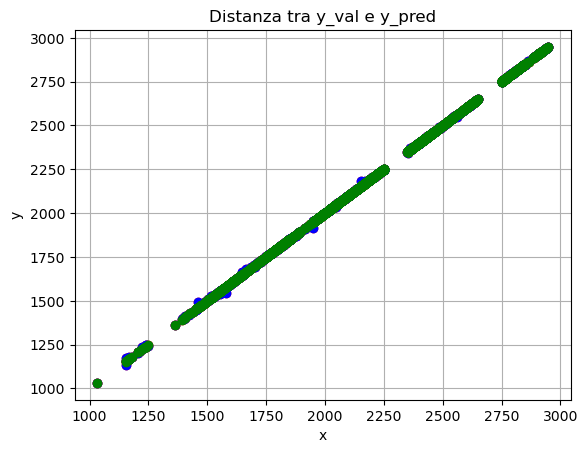

In [42]:
#distanza tra x_val e y_pred
import math
distanza = abs(y_pred - y_val)

print("Distanza tra y_val e y_pred:", distanza)
plt.plot([y_val, y_val], [y_val, y_pred], 'ro-', label='Distanza')
plt.plot(y_val, y_pred, 'bo', label='Valore predetto')
plt.plot(y_val, y_val, 'go', label='Valore di x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distanza tra y_val e y_pred')
plt.grid(True)
plt.show()


## GRID SEARCH

In [158]:
scorer = make_scorer('mean_squared_error', greater_is_better=False)

params = {'n_estimators': [500,600,720],
           'max_depth':[35,40], 
           'min_samples_split':[2,3], 
           'min_samples_leaf':[1,2]
           }

clf_optimized = GridSearchCV(model,param_grid=params,cv=10,n_jobs=n_cpu-1,scoring= scorer,refit=True)
clf_optimized.fit(x_train, y_train)
print("Migliori iperparametri:",clf_optimized.best_params_)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Migliori iperparametri: {'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 720}


In [159]:
# Assegnazione dei migliori parametri al classificatore
best_params = clf_optimized.best_params_
model.set_params(**best_params)
model.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=35, n_estimators=720)

In [160]:
# Calcolo delle previsioni
y_pred = model.predict(x_test)

# Calcolo del MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("r2:", r2)

Mean Squared Error: 4.709533195166662
Root Mean Squared Error: 2.1701458925995416
r2: 0.999969958201674


In [151]:
print(model.predict([[3,17.76999260194176,1.0347295405014274,1,16.59715122620208,987.396,1.9]]))

[2897.96836392]
